## BME i9400
## Fall 2025

### Machine Learning Fundamentals

**Note**: this lecture's contents bear some overlap with Lecture 05. Due to the importance of the redundant conceps (i.e., classification vs regression, stochastic vs batch gradient descent), I have deliberately retained the overlap. 

## Supervised learning 
- The most common form of machine learning
- The model is trained (i.e., "supervised") to provide the correct output for a given input
- The training is done using a *labeled* dataset of input-output pairs

## Supervised learning (cont'd)
- $y = f(x) + e$
- $y$: the desired output of the model, also known as the *target* or *label*
- $x$: the variables used by the model to make predictions, also known as the *features* or *predictors*
- $e$: the error term, also known as the *noise*
- $f$: the function whose parameters that we are trying to learn, also known as the *model*
    - The noise term $e$ comprises noise in the features, noise in the labels, variables that are not accounted for in the set of features, as well as an overly simplistic function $f$ 

## Forms of supervised learning
- **Regression**: the target variable is continuous
- Examples of regression problems
    - Predicting the price of a house based on its specifications
    - Predicting the age of an embryo based on ultrasound image
    - Predicting the future value of a stock based on historical data

## Forms of supervised learning (cont'd)
- **Classification**: the target is categorical
- Examples of classification problems
    - Predicting whether an email is spam or not
    - Predicting whether a patient has an arrhythmia based on an ECG
    - Transcribing speech to text

## Elements of a supervised learning problem
- **features** $x$: the data that we will use to make predictions
- **target** $y$: the variable that we are trying to predict
- **model** $f$: the mathematical relationship between features and target (a function whose parameters that we are trying to learn)
    - We specify the type of function (e.g. linear, polynomial, Gaussian)
- **loss function** $L$: a measure of how good the model's predictions are compared to the targets (the ground-truth) 
- **optimization method**: a procedure for finding the model that minimizes the loss function (typically some form of gradient descent)

## A machine learning dataset
- A dataset is a collection of data points
- $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(N)}, y^{(N)})\}$
- $N$: the number of data points in the dataset
- $x^{(i)}$: the features of the $i$-th data point
    - This is generally a column vector of $D$ values 
    - For example, it may be the vector of pixel intensity values of an ultrasound image
- $y^{(i)}$: the target value of the $i$-th data point

## Training and test datasets
- The dataset is typically split into two parts: training and test datasets
- Common split ratios are 80/20 and 70/30 (training set is larger than the test set)
- **Training dataset**: used to train the model
- **Test dataset**: used to evaluate the model's performance on "unseen" data (*unseen to the model during training*)

## Simple case: linear model with a single feature
- $\hat{y} = w_0 + w_1 x_1$
- $\hat{y}$: the model's prediction of the target value $y$
- $w_0$: the intercept of the linear model
- $w_1$: the slope of the linear model
- $x_1$: the feature (just one in this case, so $D=1$)

## Combining feature and intercept term
- We can combine the feature $x$ and the intercept $w_0$ into a single *feature vector*
- $\hat{y} = w_0 + w_1 x = w_0 \cdot 1 + w_1 \cdot x_1$
- $\hat{y} = w^T x$
- $w = [w_0, w_1]$
- $x = [1, x_1]$

## Additional predictors
- If we have more than one feature, we simply add it to the feature vector:
- $x = [1, x_1, x_2, \ldots, x_D]$
- In this case, our model will have $D+1$ coefficients:
- $w = [w_0, w_1, w_2, \ldots, w_D]$

## Mean Squared Error (MSE) loss function
- The loss function measures how well the model's predictions approximate the targets on the training dataset
---

$L(w) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})^2$

---
- Note that the loss function is a function of the model's parameters $w$
    - Where does $w$ enter into the equation above?
- The goal of supervised learning is to find the value of $w$ that minimizes the loss function

## Minimizing the loss function
- We can use gradient descent to find the optimal values of $w$
- The gradient of the loss function with respect to $w$ is: 
---

$\nabla_w L(w) = \frac{2}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)}) x^{(i)}$

---
- where $\hat{y}^{(i)} = w^T x^{(i)}$ whose gradient is $\nabla_w \hat{y}^{(i)} = x^{(i)}$
    - Verify this for yourself (fun!)

## Gradient descent update rule
---

$w \leftarrow w - \mu \nabla_w L(w)$

---
- $\mu$: the learning rate, a so-called **hyperparameter** that determines the size of the step that we take in the direction of the negative gradient
- The term hyperparameter is used to distinguish $\mu$ from the parameters of the model $w$

## Batch versus stochastic gradient descent
- **Batch gradient descent**: the gradient is computed over the entire training dataset

---

$w_{\mathrm{new}} = w_{\mathrm{old}} - \mu \frac{2}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)}) x^{(i)}$

---

- **Stochastic gradient descent**: the gradient is computed over a single data point
---


$w_{\mathrm{new}} = w_{\mathrm{old}}  - 2 \mu (y^{(i)} - \hat{y}^{(i)}) x^{(i)}$

---
- In stochastic gradient descent, we perform $N$ updates of the model for every pass through the data
- These passes are called **epochs** in the parlance of modern machine learning

## Linear regression
- In the case of a linear model with a MSE loss, we have a closed-form solution
- $w = (X^T X)^{-1} X^T y$
- $X = [x^{(1)}, x^{(2)}, \ldots, x^{(N)}]^T$ is the $N$-by-$2$ matrix of features
    - The first column of $X$ is a column of ones
    - The second column of $X$ is the first feature $x_1$ for each training example
    - The third column of $X$ is the second feature $x_2$ for each training example
    - The last column of $X$ is the $D$-th feature $x_D$ for each training example
- $y = [y^{(1)}, y^{(2)}, \ldots, y^{(N)}]$ is the $N$-by-$1$ vector of target values

## Deriving the closed-form solution
- The loss function over the training set can be written as:
---

$L(w) = \frac{1}{N} (y - Xw)^T (y - Xw)$

---

- Taking the gradient of the loss function with respect to the weight vector:
---

$\nabla_w L(w) = - \frac{1}{N} \left( 2 X^T y - 2 X^T X w \right)  $

---

- Setting the gradient to zero gives:
---

$X^T X w = X^T y$

$w = (X^T X)^{-1} X^T y$

---

## Moore-Penrose pseudoinverse
- The operator $(X^T X)^{-1} X^T$ is known as the **Moore-Penrose pseudoinverse** of $X$
- Given a linear system $Ax = b$, the least-squares solution is given by:
---

$x^{\ast} = A^+ b$

---
- where $A^+ = (A^T A)^{-1} A^T$

## Generalization 
- **Generalization**: the ability of a model to make accurate predictions on new, unseen data
- We use the test set to evaluate a model's ability to generalize

## Overfitting
- **Overfitting** occurs when a model is too complex for the problem at hand
    - May be thought of as the model learning not just the signal but also the noise
- Diagnosed by comparing the model's performance on the training and test sets
- If the test set performance is significantly worse than the training set performance, this indicates overfitting
- The risk of overfitting is mitigated by training the model with many examples: pairs of $(x, y)$

## Polynomial regression
- A linear model can be augmented to include higher-order terms
- For example, a quadratic model has the form:
---

$\hat{y} = w_0 + w_1 x + w_2 x^2$

---

- A cubic model has the form:
---

$\hat{y} = w_0 + w_1 x + w_2 x^2 + w_3 x^3$

---
   - The feature vector is $x = [1, x, x^2, x^3]$
   - The model parameters are $w = [w_0, w_1, w_2, w_3]$
    - The prediction of the model is $\hat{y} = w^T x$
- Note that, by including higher order terms in the feature vector, the model can now account for non-linear relationships between the features and the target
- Importantly, the model that is being learned is still linear!

## Example of polynomial regression
- We will use a simulated dataset of body temperature fluctuations over 24 hours
- The temperature fluctuates due to the circadian rhythm
- We will model the data using a polynomial regression model
- The goal is to predict the body temperature at any given time

## Loading in the data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('body_temperature_data.csv')
x = data['time'].to_numpy()
y = data['temperature'].to_numpy()

data.head()
print(x.shape, y.shape)

(25,) (25,)


## Displaying the data

Text(0, 0.5, 'Body Temperature (Celsius)')

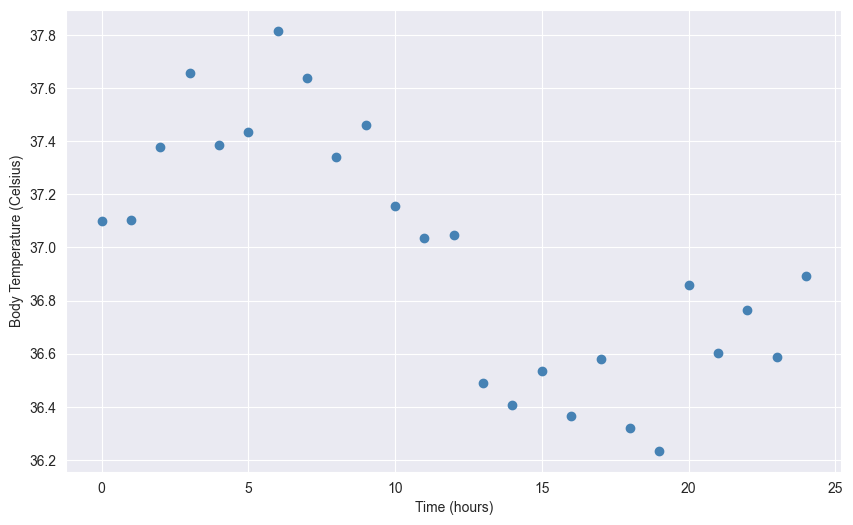

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Simulated Body Temperature', marker='o', color='steelblue', linestyle='')
plt.xlabel('Time (hours)')
plt.ylabel('Body Temperature (Celsius)')

## What is the functional form relating time to temperature?
- Relatedly, how many degrees should be in our polynomial model?

## Creating our polynomial feature vector

In [11]:
x10 = x ** 10
x9 = x ** 9
x8 = x ** 8
x7 = x ** 7
x6 = x ** 6
x5 = x ** 5
x4 = x ** 4
x3 = x ** 3
x2 = x ** 2
x1 = x ** 1
x0 = x ** 0
x = np.stack( (x10, x9, x8, x7, x6, x5, x4, x3, x2, x1, x0), axis=1)
print(f"The shape of x is: {x.shape}")

The shape of x is: (25, 11)


## Split the data into training and test sets
- For simplicity, we will take the first 80 examples as the training set and the remaining examples as the test set

In [12]:
# make sure that you understand the slicing syntax!

x_train = x[:20,:] 
y_train = y[:20]

x_test = x[20:,:]
y_test = y[20:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20, 11), (20,), (5, 11), (5,))

## Fit a polynomial regression model to our training data
- We will compute the closed-form solution with the pseudoinverse

In [13]:
w = np.linalg.pinv(x_train) @ y_train # the @ symbol is matrix multiplication in Python
print(f"The coefficients of the polynomial model are: {w}")

The coefficients of the polynomial model are: [ 7.99405580e-09 -7.57792652e-07  3.06561104e-05 -6.90759476e-04
  9.48576920e-03 -8.15605023e-02  4.33676248e-01 -1.35284704e+00
  2.18364937e+00 -1.20663701e+00  3.71005205e+01]


In [14]:
for i in range(len(w)):
    print(f"w_{i} = {w[i]}")

w_0 = 7.9940558014785e-09
w_1 = -7.577926519295292e-07
w_2 = 3.065611041288551e-05
w_3 = -0.0006907594755111348
w_4 = 0.009485769195845734
w_5 = -0.08156050226479561
w_6 = 0.43367624841011043
w_7 = -1.352847036389086
w_8 = 2.183649370122893
w_9 = -1.2066370144919887
w_10 = 37.10052049352098


## Make predictions on the test set

In [15]:
yhat_test = x_test @ w
yhat_test

array([  41.06380438,   67.2175473 ,  157.62959396,  408.07323489,
       1010.86048965])

## Visualize the training and test sets
- We will plot the training data, the test data, and the model's predictions on the test data

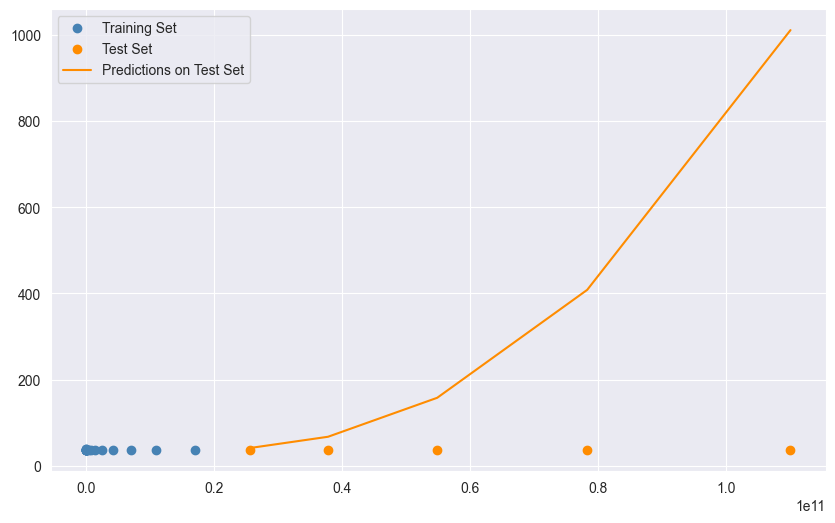

In [16]:
fig = plt.figure(figsize=(10, 6))
plt.plot(x_train[:,2], y_train, label='Training Set', marker='o', color='steelblue', linestyle='')
plt.plot(x_test[:,2], y_test, label='Test Set', marker='o', color='darkorange', linestyle='')
plt.plot(x_test[:,2], yhat_test, label='Predictions on Test Set', color='darkorange', linestyle='-')
plt.legend()

#plt.plot(x_train[:,1], y_train, label='Training Set', marker='o', color='steelblue', linestyle='')
#plt.plot(x_test[:,1], y_test, label='Test Set', marker='o', color='darkorange', linestyle='')
#plt.plot(x_test[:,1], yhat_test, label='Predictions on Test Set', color='darkorange', linestyle='-')

## How well did our model perform?

## Data generation below

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Time range over 24 hours (e.g., in hours)
time_hours = np.linspace(0, 24, 25)

# Amplitude of the body temperature fluctuation (in degrees Celsius)
amplitude = 0.5

# Baseline body temperature (in degrees Celsius)
baseline_temp = 37.0

# Period of the circadian rhythm (roughly 24 hours)
period = 24

# Noise level (standard deviation)
noise_level = 0.2

# Simulated body temperature as a function of time with sinusoidal circadian rhythm and noise
temperature = baseline_temp + amplitude * np.sin(2 * np.pi * time_hours / period) + np.random.normal(0, noise_level, time_hours.shape)

# Plot the simulated data
plt.figure(figsize=(10, 6))
plt.plot(time_hours, temperature, label='Simulated Body Temperature', marker='o', color='steelblue', linestyle='')
plt.xlabel('Time (hours)')
plt.ylabel('Body Temperature (Celsius)')
plt.title('Simulated Body Temperature Fluctuations Due to Circadian Rhythm')
plt.grid(True)
plt.legend()
plt.show()

df = pd.DataFrame({'time': time_hours, 'temperature': temperature})
df.to_csv('body_temperature_data.csv', index=False)
